In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import ensemble
from sklearn import metrics
from sklearn import tree #модели деревьев решения

from sklearn.model_selection import train_test_split

In [2]:
churn_data  = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/churn.zip')
churn_data .head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Оставляем  только клиентов из Германии (модель лучше строить индивидуально для каждой страны)

In [3]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

Избавляемся от неинформативных признаков

In [4]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [5]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Пропусков нет

Создадим дополнительные признаки

In [6]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


Разделим выборку

In [7]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Дерево решений

In [9]:
#Создаём объект класса RandomForestClassifier
dt_full = tree.DecisionTreeClassifier(
    max_depth=8, #максимальная глубина дерева
    criterion='entropy', #критерий эффективности
    min_samples_leaf=10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
dt_full.fit(X_train, y_train)

y_train_predict = dt_full.predict(X_train)
print(f'Train f1_score {metrics.f1_score(y_train, y_train_predict)}')
y_test_predict = dt_full.predict(X_test)
print(f'Test f1_score {metrics.f1_score(y_test, y_test_predict)}')

print(f'Test accuracy {metrics.accuracy_score(y_train, y_train_predict)}')
print(f'Test accuracy {metrics.accuracy_score(y_test, y_test_predict)}')

print(f'Test precision_score {metrics.precision_score(y_train, y_train_predict)}')
print(f'Test precision_score {metrics.precision_score(y_test, y_test_predict)}')

print(f'{metrics.classification_report(y_train, y_train_predict)}')
print(f'{metrics.classification_report(y_test, y_test_predict)}')


Train f1_score 0.7172538392050587
Test f1_score 0.6397849462365591
Test accuracy 0.8335991493886231
Test accuracy 0.7866242038216561
Test precision_score 0.7987927565392354
Test precision_score 0.7083333333333334
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.58      0.64       204

    accuracy                           0.79       628
   macro avg       0.76      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



Строим модель

In [10]:
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    
    min_samples_leaf = 10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)

y_train_predict = rf_clf_full.predict(X_train)
print(f'Train f1_score {metrics.f1_score(y_train, y_train_predict)}')
y_test_predict = rf_clf_full.predict(X_test)
print(f'Test f1_score {metrics.f1_score(y_test, y_test_predict)}')


Train f1_score 0.7359550561797752
Test f1_score 0.6556473829201102


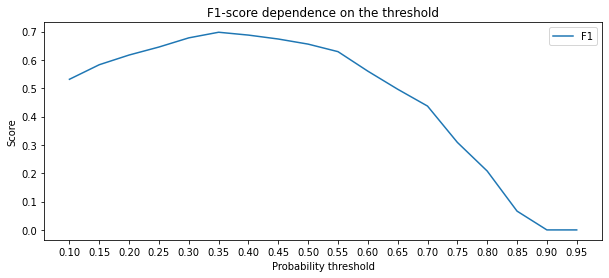

In [12]:
y_test_proba_pred = pd.Series(rf_clf_full.predict_proba(X_test)[:, 1])
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, f1_scores, label='F1')
ax.set_title('F1-score dependence on the threshold')
ax.set_xticks(thresholds) 
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

In [13]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.35
#Клиентов, для которых вероятность ухода > 0.35, относим к классу 1
#В противном случае — к классу 0
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test F1: 0.70
